# Task 1: Introduction
Image Classification with TensorFlow.

We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.



### Import TensorFlow

In [ ]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


# Task 2: The Dataset
### Import MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Plot an Image Example

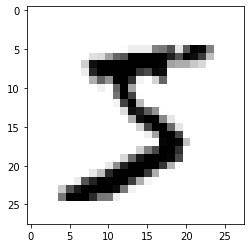

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

### Display Labels

In [ ]:
y_train[0]

5

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [ ]:
print('y_train_encoded shape',y_train_encoded.shape)
print('y_test_encoded shape' ,y_test_encoded.shape)

y_train_encoded shape (60000, 10)
y_test_encoded shape (10000, 10)


### Display Encoded Labels

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print('x_train_reshaped:',x_train_reshaped.shape)
print('x_test_reshaped:',x_test_reshaped.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)


### Display Pixel Values

In [ ]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm = (x_train_reshaped-x_mean) / (x_std+epsilon)
x_test_norm = (x_test_reshaped-x_mean) / (x_std+epsilon)

### Display Normalized Pixel Values

In [ ]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 5: Creating a Model
### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(128, activation='relu',input_shape=(784,)),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')
])

### Compiling the Model

In [ ]:
model.compile(
      optimizer='sgd',
      loss = 'categorical_crossentropy',
      metrics =['accuracy']
  )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 6: Training the Model

### Training the Model

In [ ]:
model.fit(x_train_norm, y_train_encoded, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3685 - accuracy: 0.8929
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1829 - accuracy: 0.9459
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1376 - accuracy: 0.9594


### Evaluating the Model

In [ ]:
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test case accuracy :', accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9628
Test case accuracy : 96.28000259399414


# Task 7: Predictions

### Predictions on Test Set

In [ ]:
preds = model.predict(x_test_norm)
print('Shape of preds: ', preds.shape)

Shape of preds:  (10000, 10)


### Plotting the Results

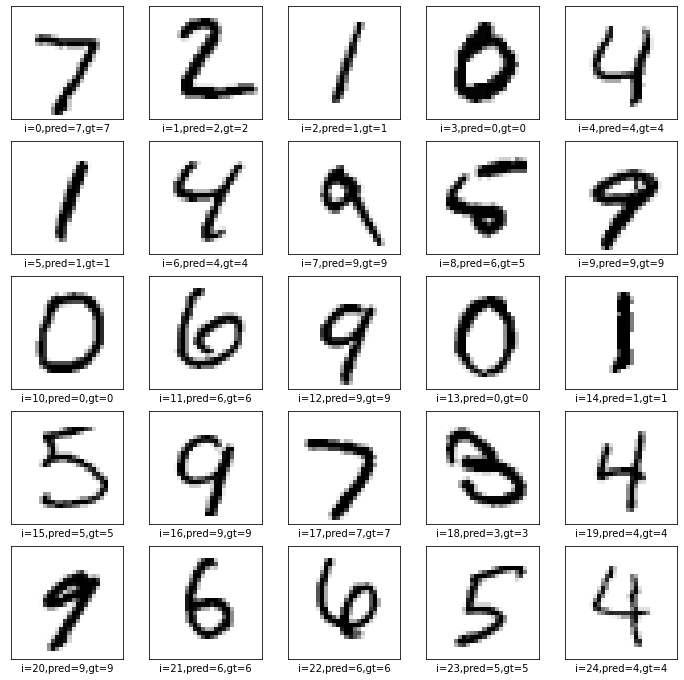

In [ ]:
plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  pred = np.argmax(preds[start_index+i])
  gt = y_test[start_index+i]

  col = 'g'
  if pred!=gt:
    col='r'
  
  plt.xlabel('i={},pred={},gt={}'.format(start_index+i, pred, gt))
  plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()


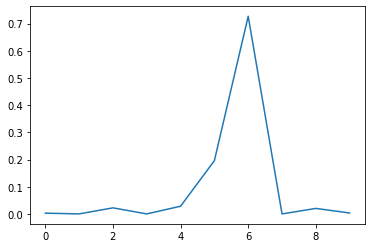

In [ ]:
plt.plot(preds[8])
plt.show()